# 使用方法：
在 json_extract_v2.py 里面的main方法里选择一个你要生成的csv文件（其他两个注释掉即可），然后在local_conf.yaml里指定你的数据源路径，运行json_extract_v2.py可以生成对应的csv，倒数第三个字段是时间戳，最后两个字段是label

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime, timedelta

%matplotlib inline

df = pd.read_csv('../csv/dataset.csv')
column = df.columns
df.head()


,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,0,16,20,0,48,41472,257790,0,12,2,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1593395580,ixnetwork-traffic-start,0
1,1,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1593395640,ixnetwork-traffic-start,0
2,2,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1593395700,ixnetwork-traffic-start,0
3,3,16,20,0,48,41472,257790,0,12,2,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1593395760,ixnetwork-traffic-start,0
4,4,16,20,0,48,41472,257790,0,12,2,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1593395820,ixnetwork-traffic-start,0


In [21]:
# 时间戳转成 小时:分钟 形式
X = (pd.to_datetime(df[column[-3]], unit='s') + timedelta(hours=9)).dt.strftime('%d %H:%M')
X.head()

0    29 10:53
1    29 10:54
2    29 10:55
3    29 10:56
4    29 10:57
Name: v_/time, dtype: object

In [22]:
# 刻度每5min一个
X_axis = X[::5]
X_axis.head()

0     29 10:53
5     29 10:58
10    29 11:03
15    29 11:08
20    29 11:13
Name: v_/time, dtype: object

In [23]:
def draw_nxm(n, m, start=0):
    for i in range(n):
        plt.figure(figsize=(20, 6))
        for j in range(m):
            index = (i * n) + j + start
            if index > len(column) - 1 :
                break
            y = df[column[index]]
            plt.subplot(n,m,1+index-start)
            plt.plot(X,y)
            plt.title('#'+str(index))
            plt.axis('off')
        plt.show()


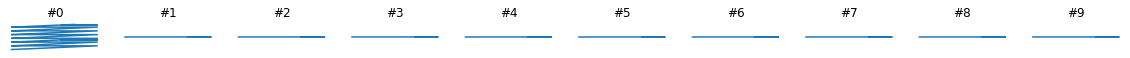

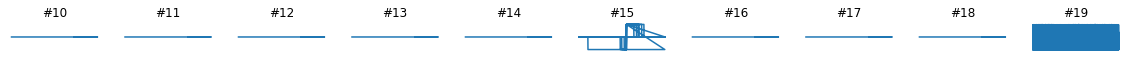

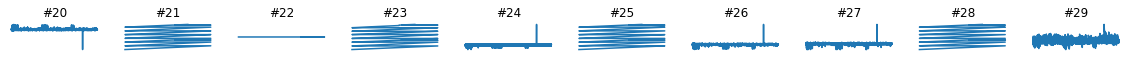

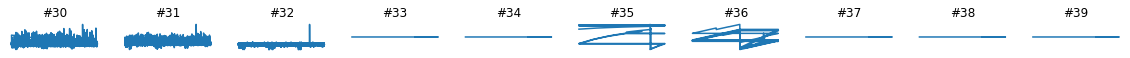

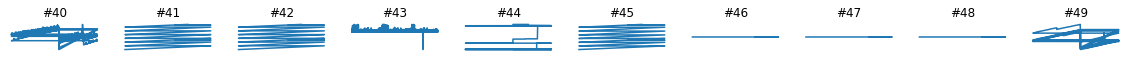

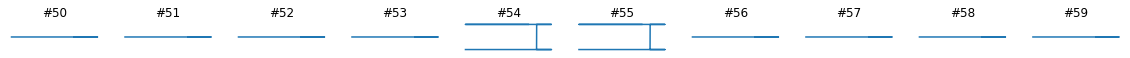

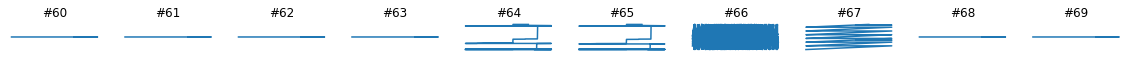

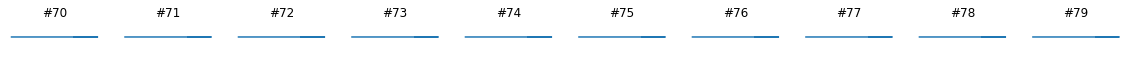

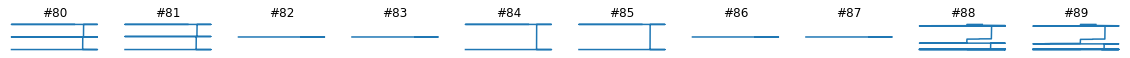

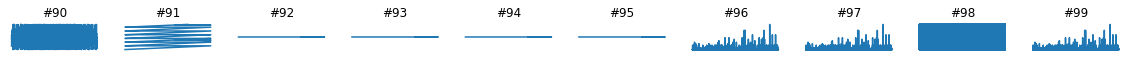

In [6]:
# 注意别画太多，很耗时
draw_nxm(10,10)

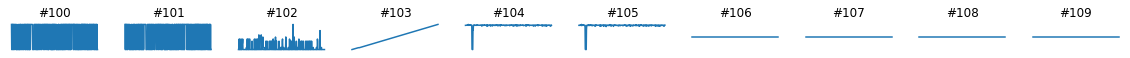

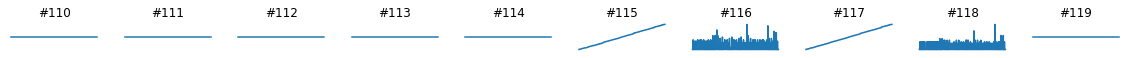

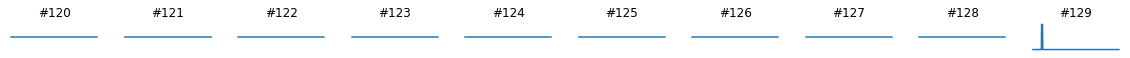

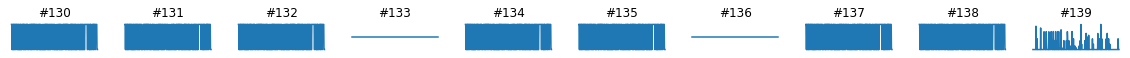

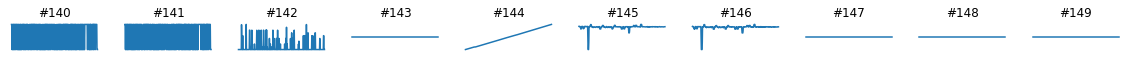

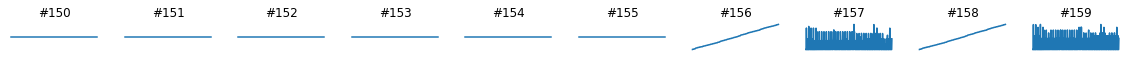

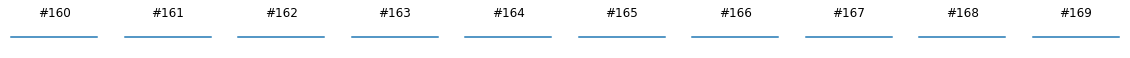

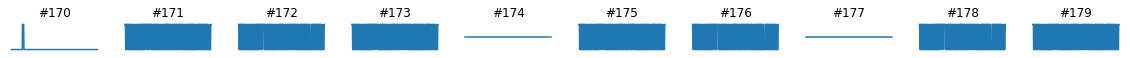

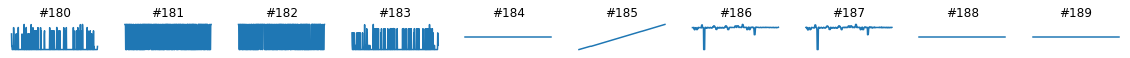

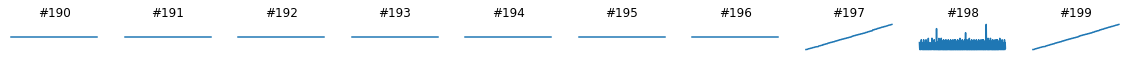

In [6]:
# 从第100个属性开始
draw_nxm(10,10,100)

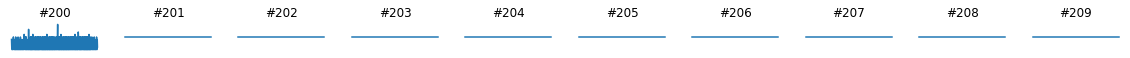

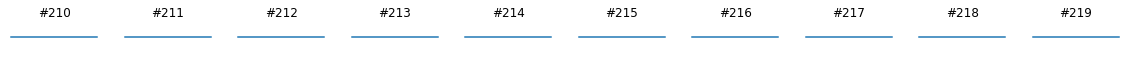

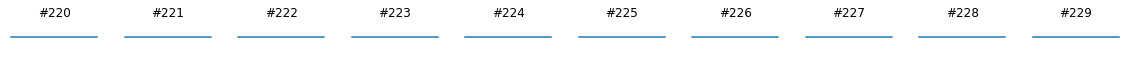

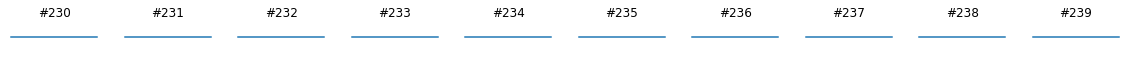

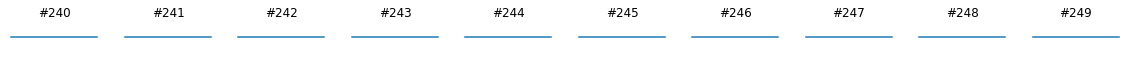

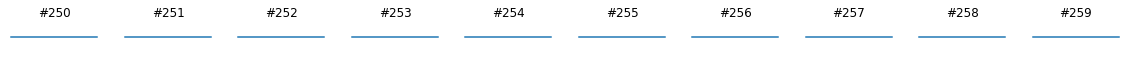

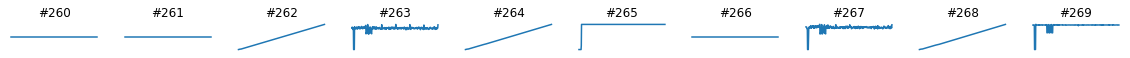

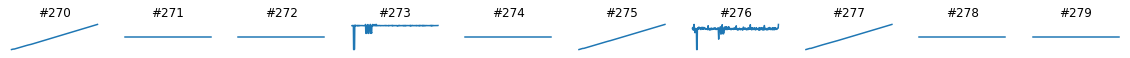

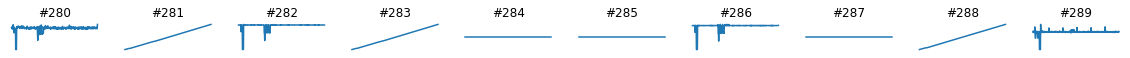

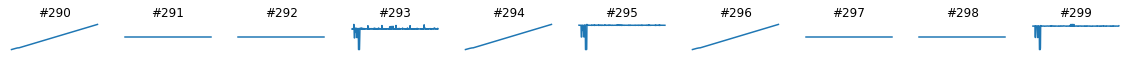

In [7]:
# 从第200个属性开始
draw_nxm(10,10,200)

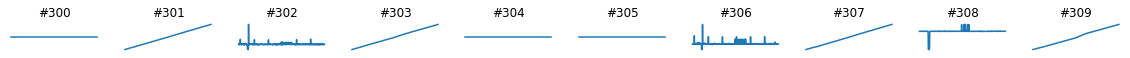

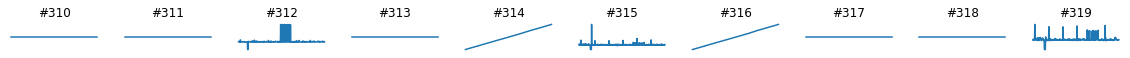

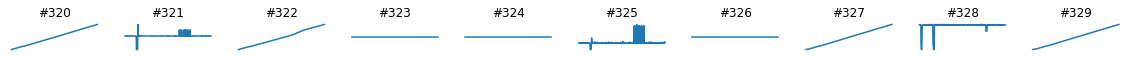

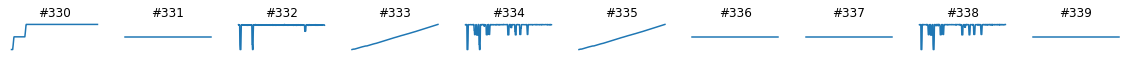

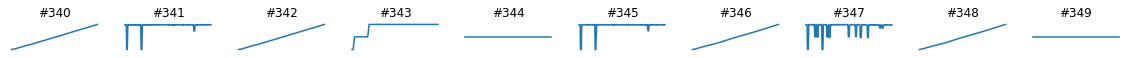

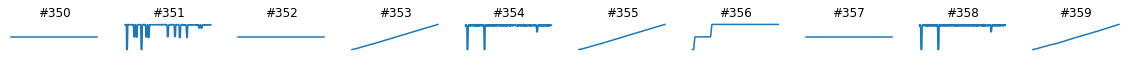

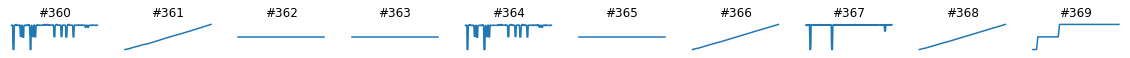

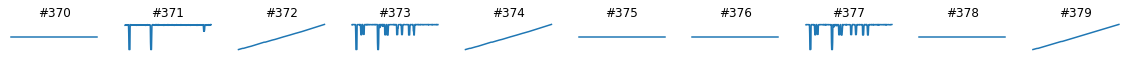

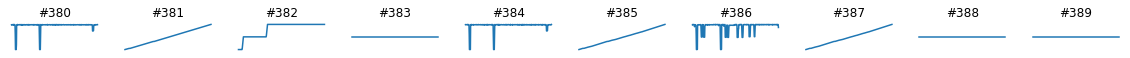

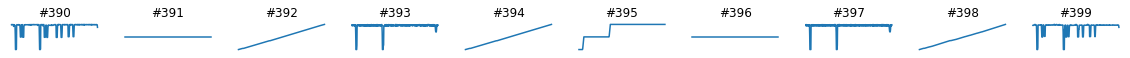

In [8]:
# 从第300个属性开始
draw_nxm(10,10,300)

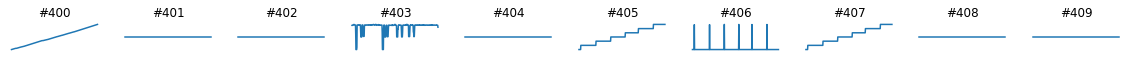

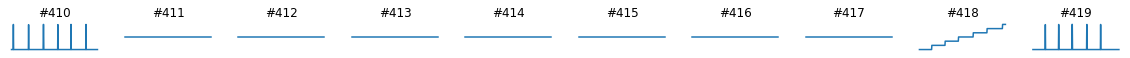

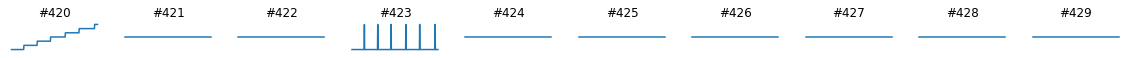

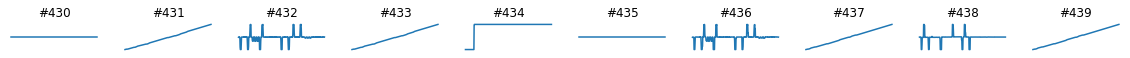

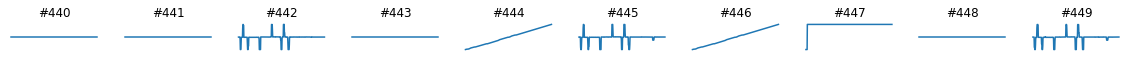

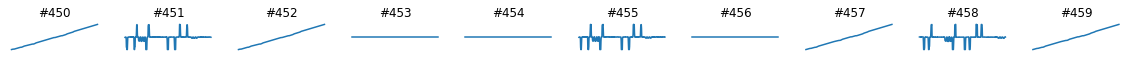

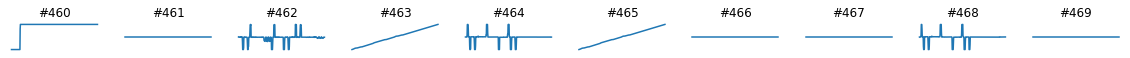

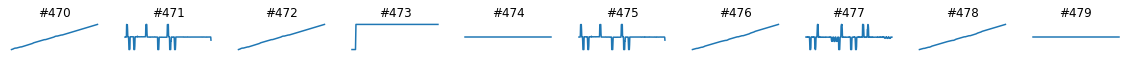

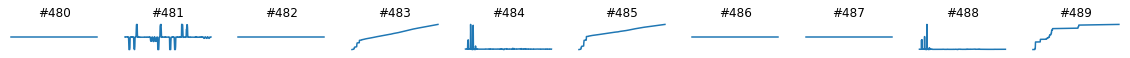

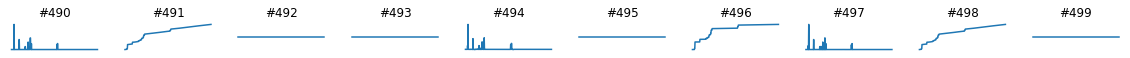

In [9]:
# 从第400个属性开始
draw_nxm(10,10,400)

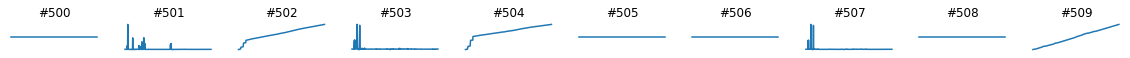

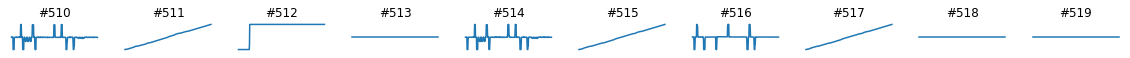

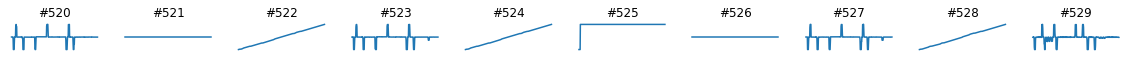

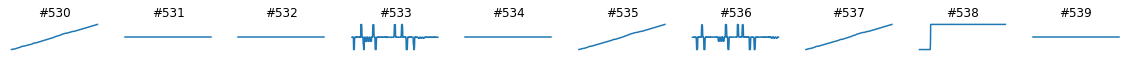

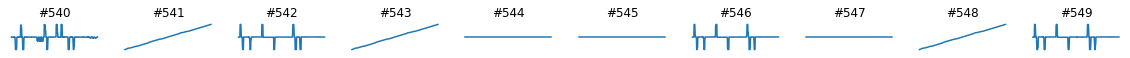

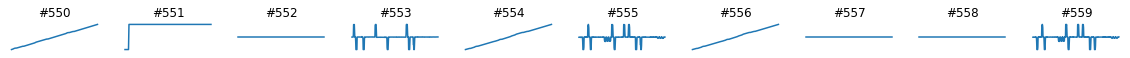

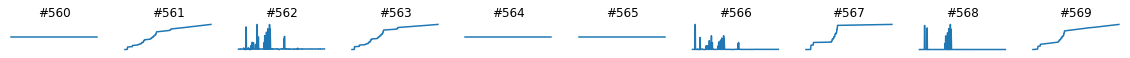

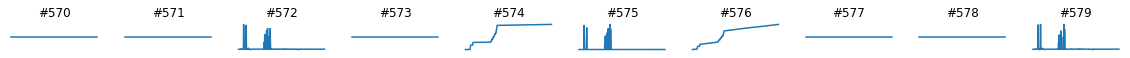

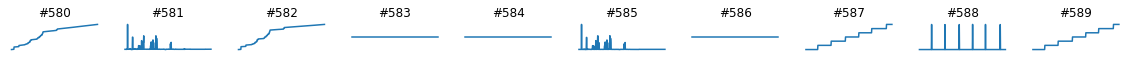

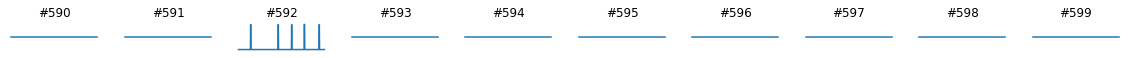

In [10]:
# 从第500个属性开始
draw_nxm(10,10,500)

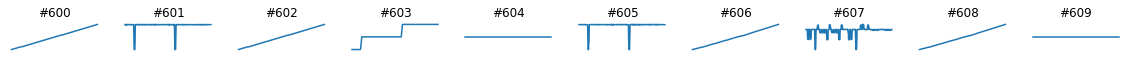

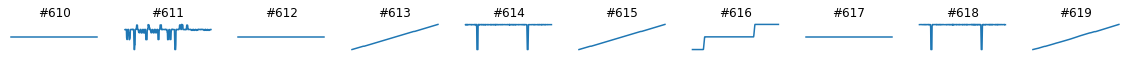

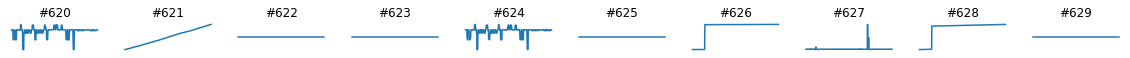

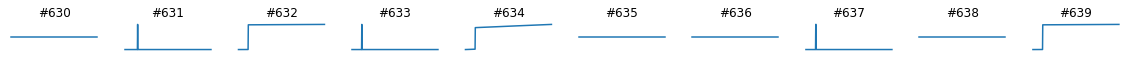

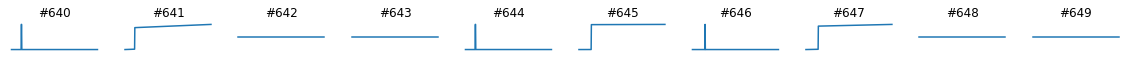

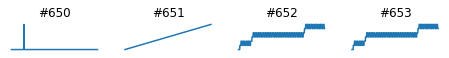

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

<Figure size 1440x432 with 0 Axes>

In [11]:
# 从第600个属性开始
draw_nxm(10,10,600)

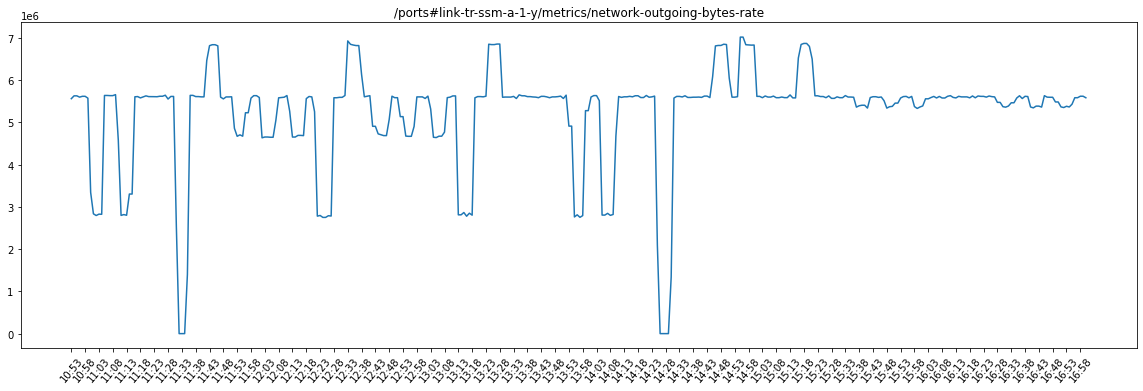

In [12]:
# column[index] 输入你要查看的编号即可
col_name = column[607]
y1 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y1)
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

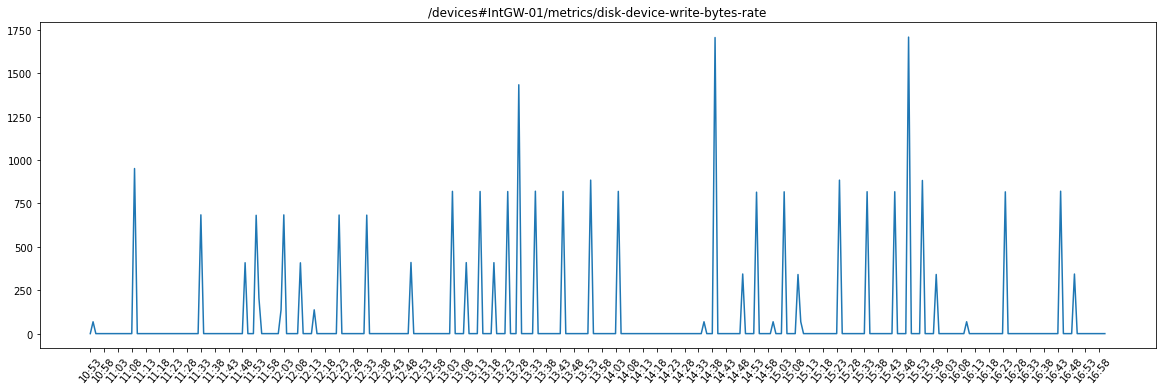

In [13]:
col_name = column[17]
y2 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y2)
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()


In [10]:
col_list = column.to_list()
print(col_list.index('v_/ports#IntGW-01/metrics/network-incoming-packets-rate'))

642


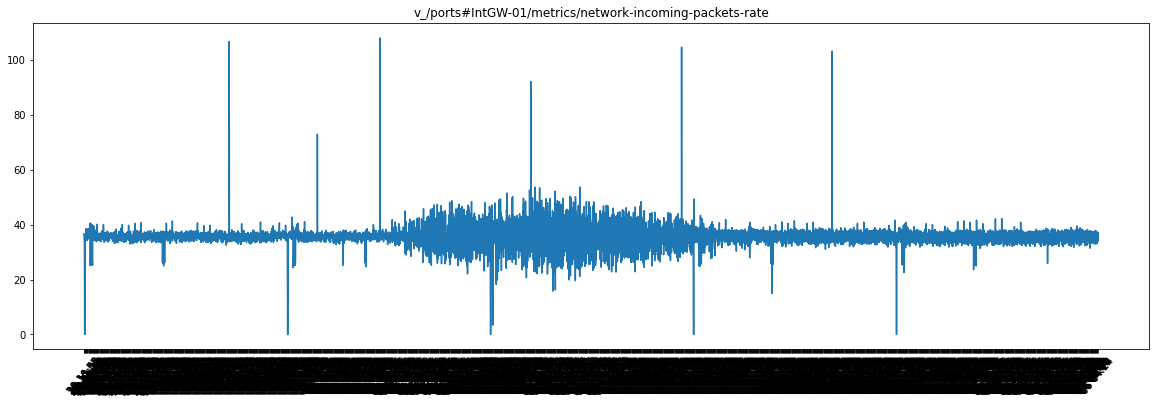

In [24]:
col_name = column[642]
y642 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y642)
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

In [41]:
code_56_list = df.loc[df['v_type_code'].isin([5, 6])].index
len(code_56_list)

3452

In [42]:
code_78_list = df.loc[df['v_type_code'].isin([7, 8])].index
len(code_78_list)

3461

In [33]:
code_5_list = df.loc[df['v_type_code']==5].index.to_list()
len(code_5_list)

1707

In [31]:
code_6_list = df.loc[df['v_type_code']==6].index.to_list()
len(code_6_list)

1745

In [32]:
code_7_list = df.loc[df['v_type_code']==7].index.to_list()
len(code_7_list)

1710

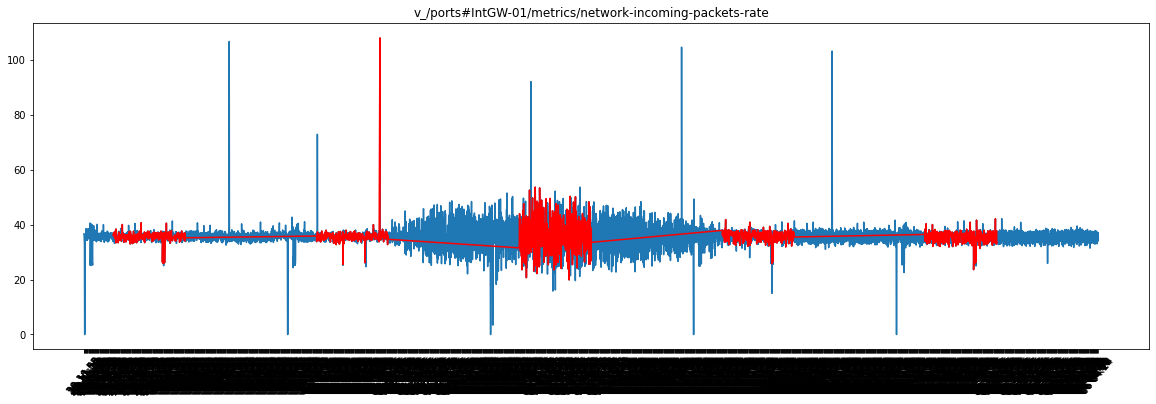

In [26]:
col_name = column[642]
y642 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y642)
plt.plot(X[code_5_list],y642[code_5_list], 'r')
# plt.plot(X[code_6_list],y642[code_6_list], 'g')
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

In [27]:
print(col_list.index('v_/ports#IntGW-01/metrics/network-incoming-packets-rate'))
print(col_list.index('v_/ports#IntGW-01/metrics/network-outgoing-packets-error'))
print(col_list.index('v_/ports#IntGW-01/metrics/network-outgoing-packets-drop'))

print(col_list.index('v_/ports#IntGW-02/metrics/network-incoming-packets-rate'))
print(col_list.index('v_/ports#IntGW-02/metrics/network-incoming-packets-error'))
print(col_list.index('v_/ports#IntGW-02/metrics/network-incoming-packets-drop'))

642
647
646
654
653
652


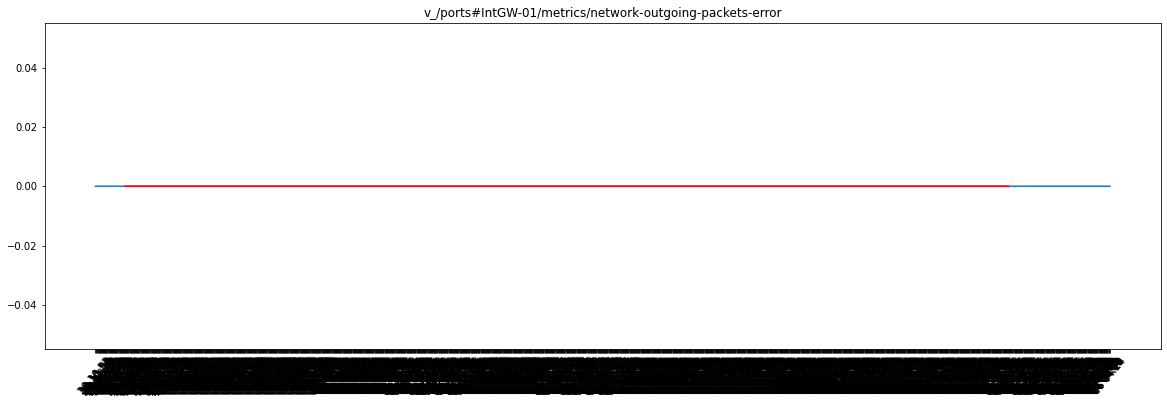

In [28]:
# error
col_name = column[647]
y647 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y647)
plt.plot(X[code_5_list],y647[code_5_list], 'r')
# plt.plot(X[code_6_list],y642[code_6_list], 'g')
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

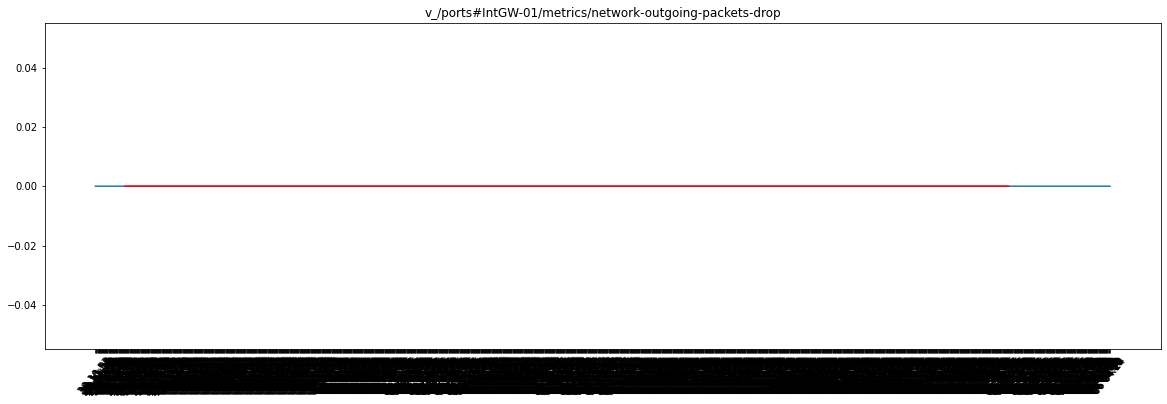

In [29]:
# drop
col_name = column[646]
y646 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y646)
plt.plot(X[code_5_list],y646[code_5_list], 'r')
# plt.plot(X[code_6_list],y642[code_6_list], 'g')
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

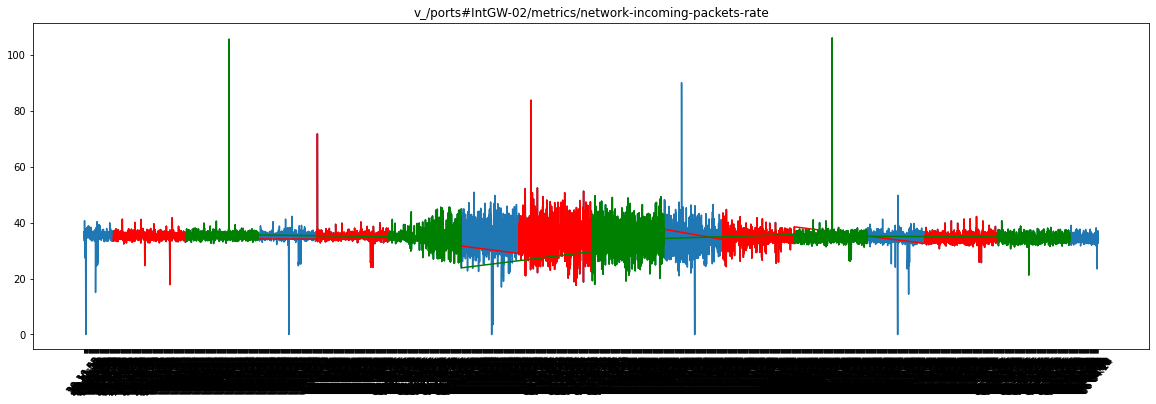

In [43]:
# rate
col_name = column[654]
y654 = df[col_name]
plt.figure(figsize=(20, 6))
plt.plot(X,y654)
plt.plot(X[code_56_list],y654[code_56_list], 'r')
# plt.scatter(x=X[code_5_list], y=y654[code_5_list], marker='.', color='r')
plt.plot(X[code_78_list],y654[code_78_list], 'g')
# plt.scatter(x=X[code_7_list], y=y654[code_7_list], marker='.', color='g')
plt.xticks(X_axis, rotation=50)
plt.title(col_name)
plt.show()

In [48]:
all_rate_col = ['v_/ports#IntGW-01/metrics/network-incoming-packets-rate','v_/ports#IntGW-01/metrics/network-outgoing-packets-rate','v_/ports#IntGW-02/metrics/network-incoming-packets-rate','v_/ports#IntGW-02/metrics/network-outgoing-packets-rate','v_/ports#RR-01/metrics/network-incoming-packets-rate','v_/ports#RR-01/metrics/network-outgoing-packets-rate','v_/ports#TR-01/metrics/network-incoming-packets-rate','v_/ports#TR-01/metrics/network-outgoing-packets-rate','v_/ports#TR-02/metrics/network-incoming-packets-rate','v_/ports#TR-02/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-exgw-a-1-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-exgw-a-2-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-exgw-a-2-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-exgw-a-3-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-exgw-b-1-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-exgw-b-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-exgw-b-2-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-exgw-b-2-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-exgw-b-3-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-exgw-b-3-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-ip-a-1-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-ip-a-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-intgw-ip-a-2-x/metrics/network-incoming-packets-rate','v_/ports#link-intgw-ip-a-2-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-a-1-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-a-1-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-a-1-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-a-2-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-a-2-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-a-2-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-a-2-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-a-3-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-a-3-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-a-3-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-a-3-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-b-1-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-b-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-b-1-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-b-1-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-b-2-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-b-2-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-b-2-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-b-2-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-b-3-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-b-3-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-intgw-b-3-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-intgw-b-3-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-ip-a-1-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-ip-a-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-ssm-a-1-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-ssm-a-1-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-ssm-b-1-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-ssm-b-1-y/metrics/network-outgoing-packets-rate','v_/ports#link-tr-tr-a-1-x/metrics/network-incoming-packets-rate','v_/ports#link-tr-tr-a-1-x/metrics/network-outgoing-packets-rate','v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate','v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate']
for rate in all_rate_col:
    print(rate, col_list.index(rate))

v_/ports#IntGW-01/metrics/network-incoming-packets-rate 642
v_/ports#IntGW-01/metrics/network-outgoing-packets-rate 648
v_/ports#IntGW-02/metrics/network-incoming-packets-rate 654
v_/ports#IntGW-02/metrics/network-outgoing-packets-rate 660
v_/ports#RR-01/metrics/network-incoming-packets-rate 666
v_/ports#RR-01/metrics/network-outgoing-packets-rate 672
v_/ports#TR-01/metrics/network-incoming-packets-rate 678
v_/ports#TR-01/metrics/network-outgoing-packets-rate 684
v_/ports#TR-02/metrics/network-incoming-packets-rate 690
v_/ports#TR-02/metrics/network-outgoing-packets-rate 696
v_/ports#link-intgw-exgw-a-1-x/metrics/network-incoming-packets-rate 702
v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-packets-rate 708
v_/ports#link-intgw-exgw-a-2-x/metrics/network-incoming-packets-rate 714
v_/ports#link-intgw-exgw-a-2-x/metrics/network-outgoing-packets-rate 720
v_/ports#link-intgw-exgw-a-3-x/metrics/network-incoming-packets-rate 726
v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoi

In [60]:
def show_rate(X, column_index, code_56_list, code_78_list, y_min=None, y_max=None):
    col_name = column[column_index]
    y = df[col_name]
    plt.figure(figsize=(20, 6))
    plt.plot(X,y)
    plt.plot(X[code_56_list],y[code_56_list], 'r')
    # plt.scatter(x=X[code_5_list], y=y654[code_5_list], marker='.', color='r')
    plt.plot(X[code_78_list],y[code_78_list], 'g')
    # plt.scatter(x=X[code_7_list], y=y654[code_7_list], marker='.', color='g')
    plt.xticks(X_axis, rotation=50)
    plt.title(col_name)
    if y_min != None and y_max!=None:
        plt.ylim(y_min, y_max)
    plt.show()

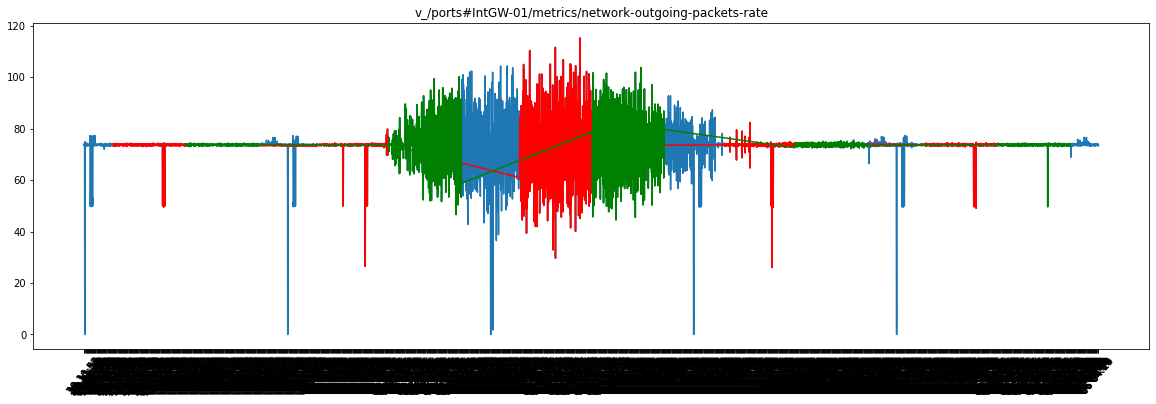

In [49]:
# rate 648
show_rate(X, 648, code_56_list, code_78_list)

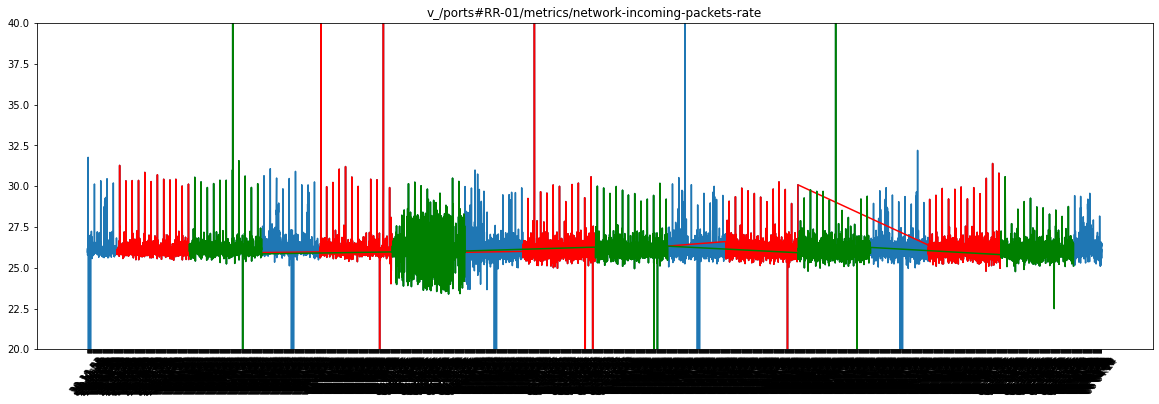

In [61]:
show_rate(X, 666, code_56_list, code_78_list, 20,40)

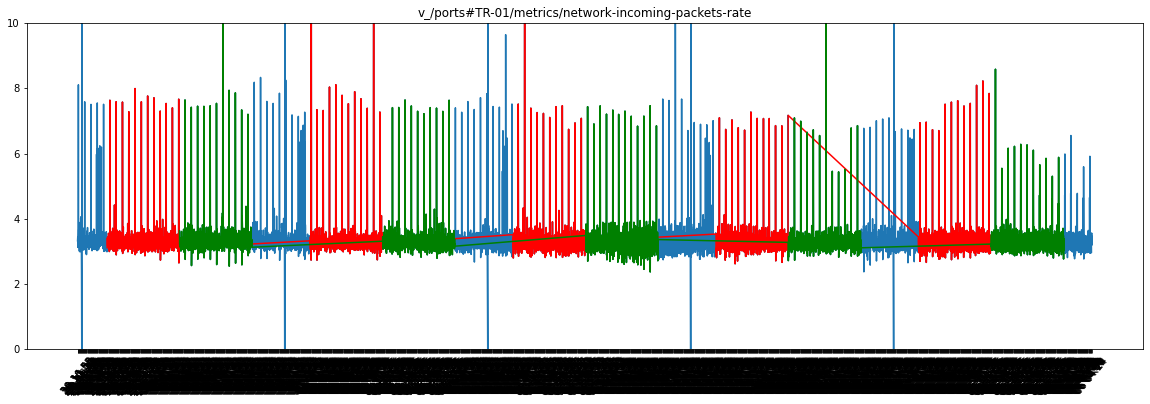

In [63]:
show_rate(X, 678, code_56_list, code_78_list,0,10)

In [ ]:
show_rate(X, 690, code_56_list, code_78_list, 0, 10)

In [ ]:
show_rate(X, 702, code_56_list, code_78_list,1400,1600)

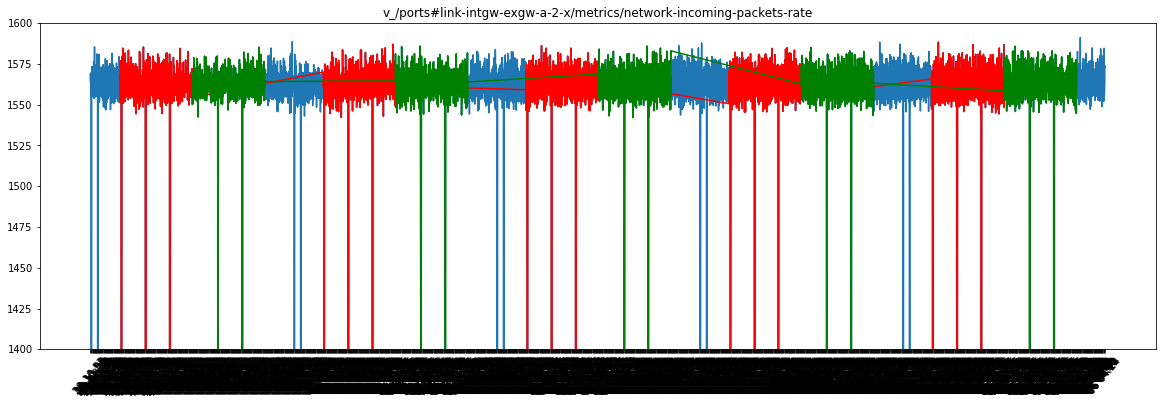

In [80]:
show_rate(X, 714, code_56_list, code_78_list,1400,1600)

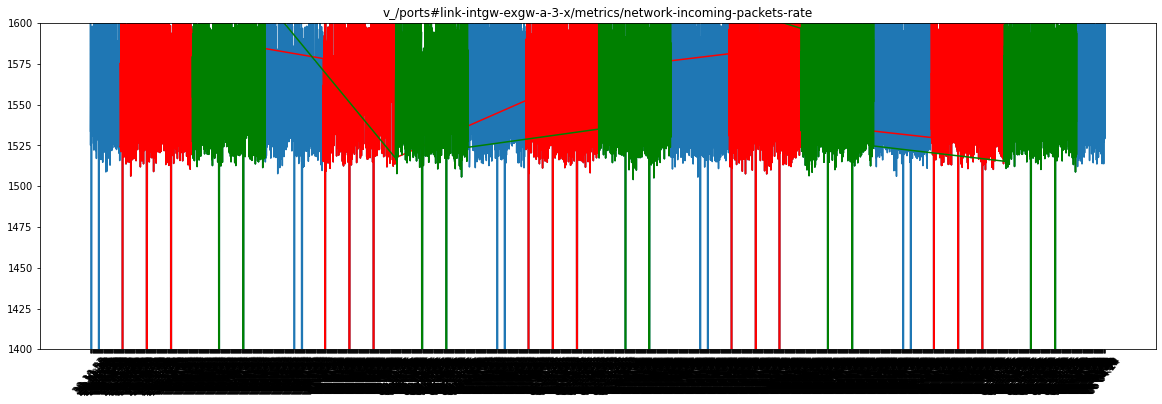

In [79]:
show_rate(X, 726, code_56_list, code_78_list,1400,1600)

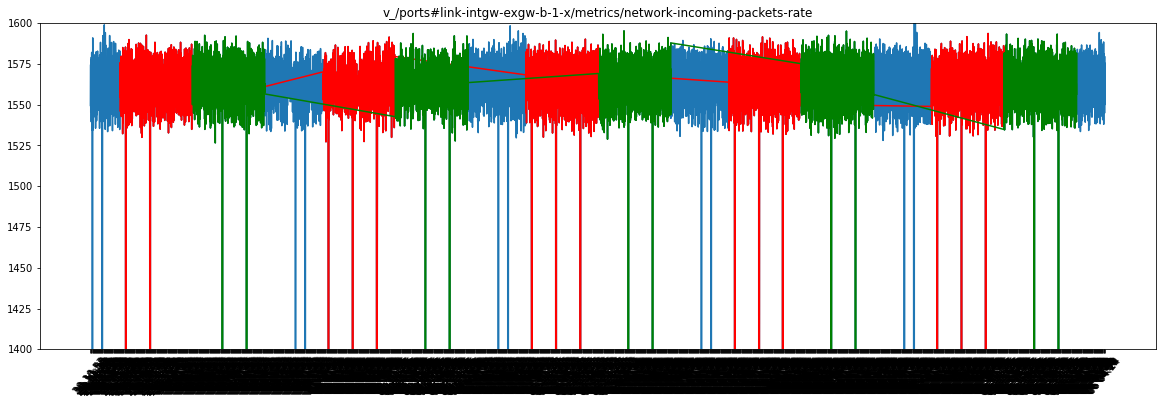

In [81]:
show_rate(X, 738, code_56_list, code_78_list,1400,1600)

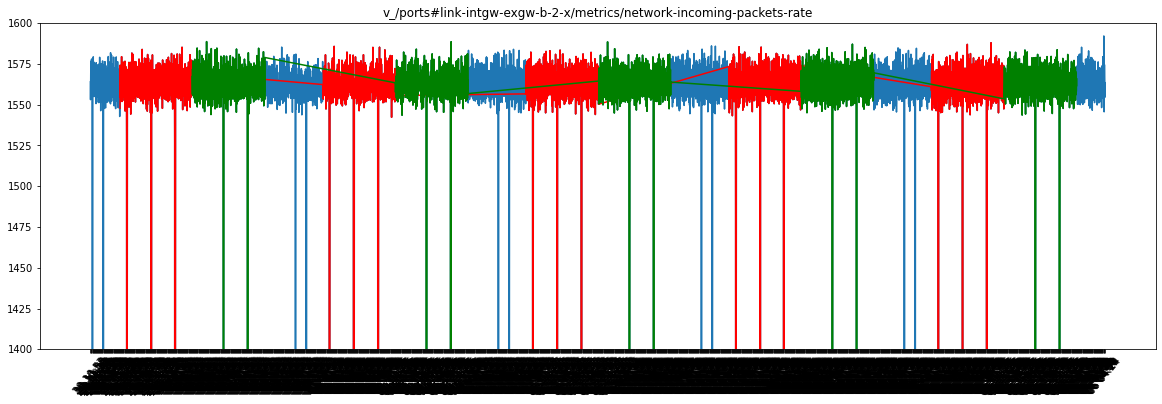

In [82]:
show_rate(X, 750, code_56_list, code_78_list,1400,1600)

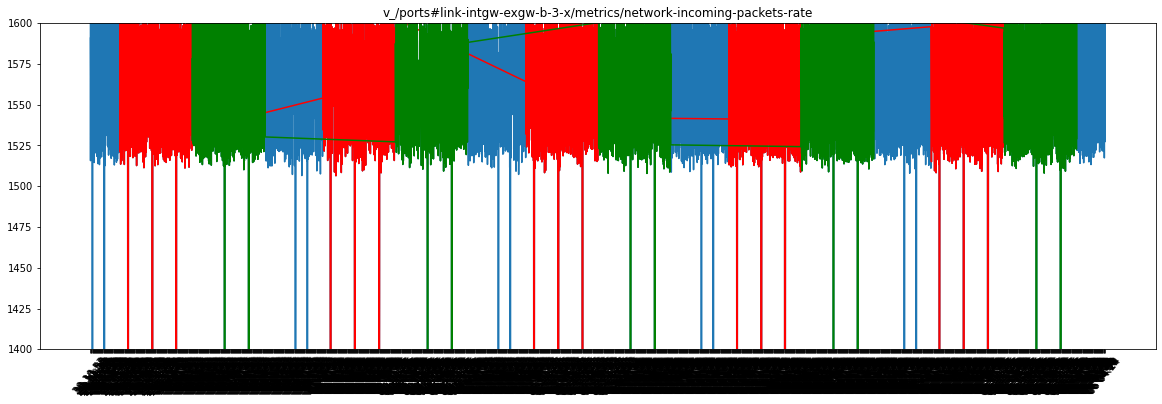

In [86]:
show_rate(X, 762, code_56_list, code_78_list,1400,1600)

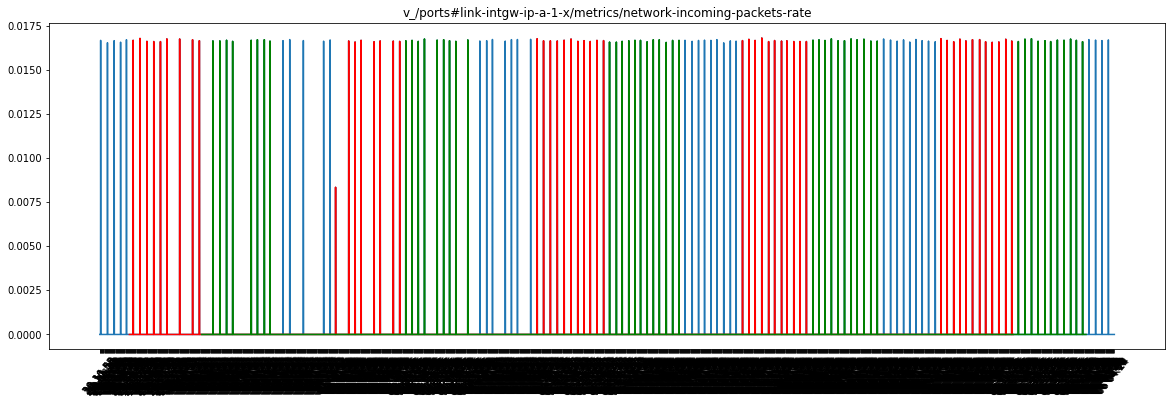

In [73]:
show_rate(X, 774, code_56_list, code_78_list)

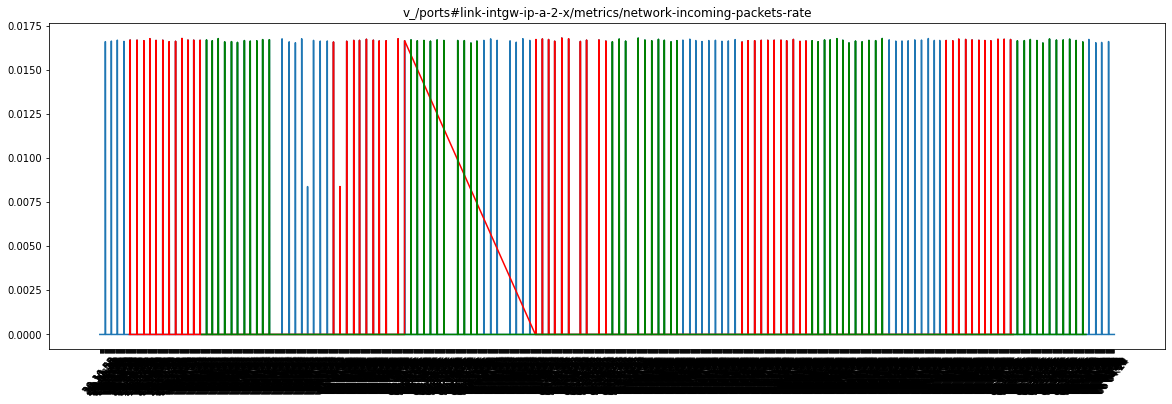

In [74]:
show_rate(X, 786, code_56_list, code_78_list)

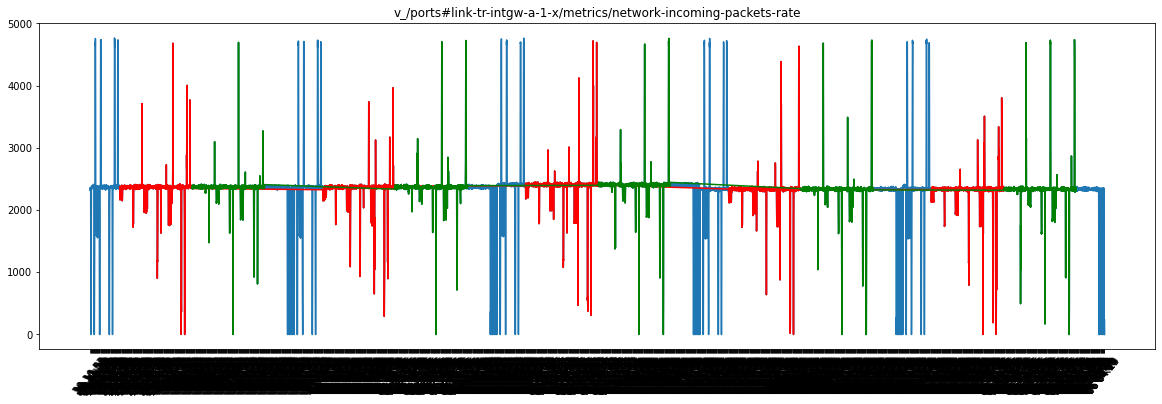

In [75]:
show_rate(X, 798, code_56_list, code_78_list)

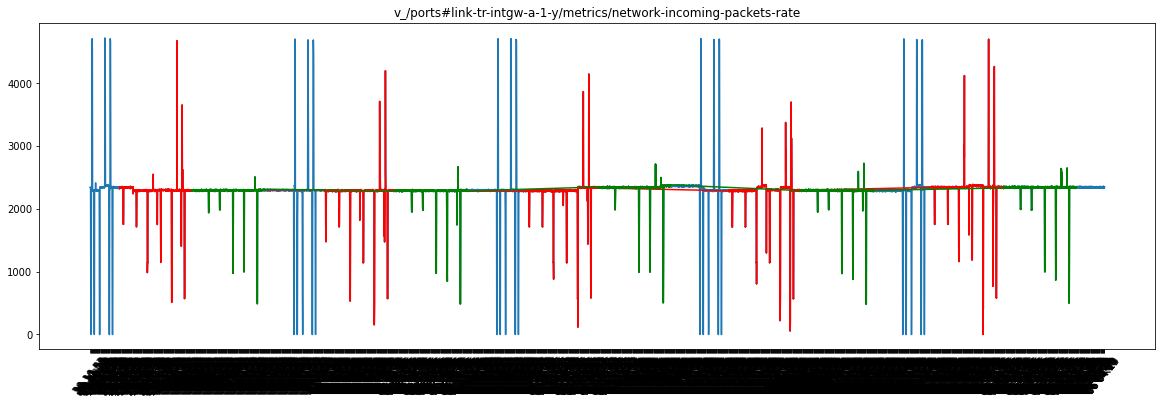

In [76]:
show_rate(X, 810, code_56_list, code_78_list)

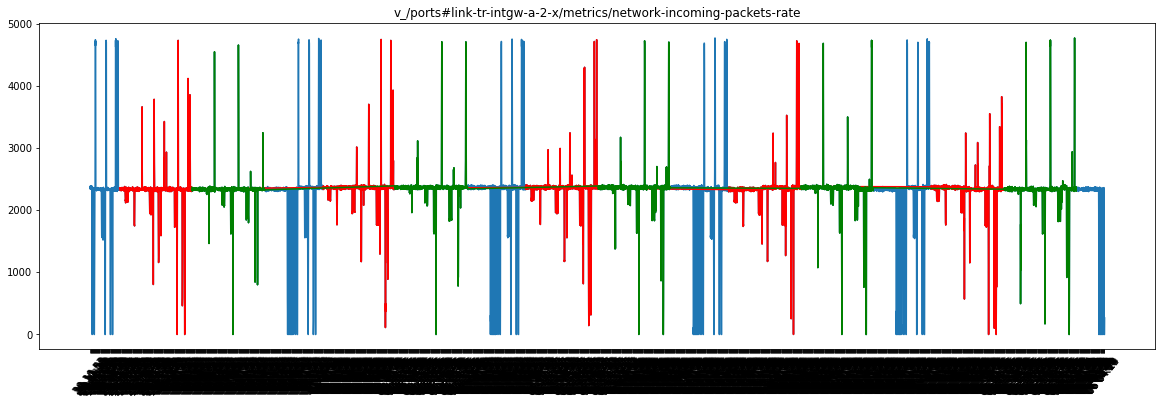

In [77]:
show_rate(X, 822, code_56_list, code_78_list)

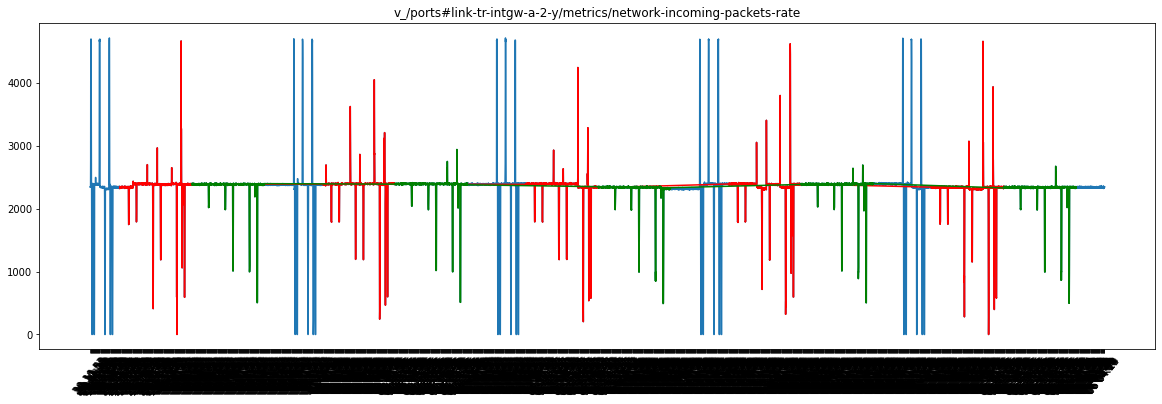

In [78]:
show_rate(X, 834, code_56_list, code_78_list)

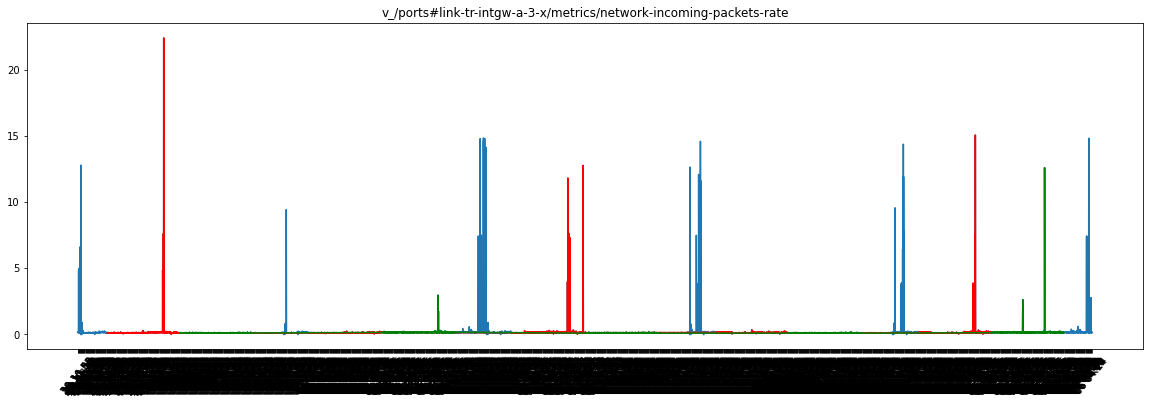

In [83]:
show_rate(X, 846, code_56_list, code_78_list)

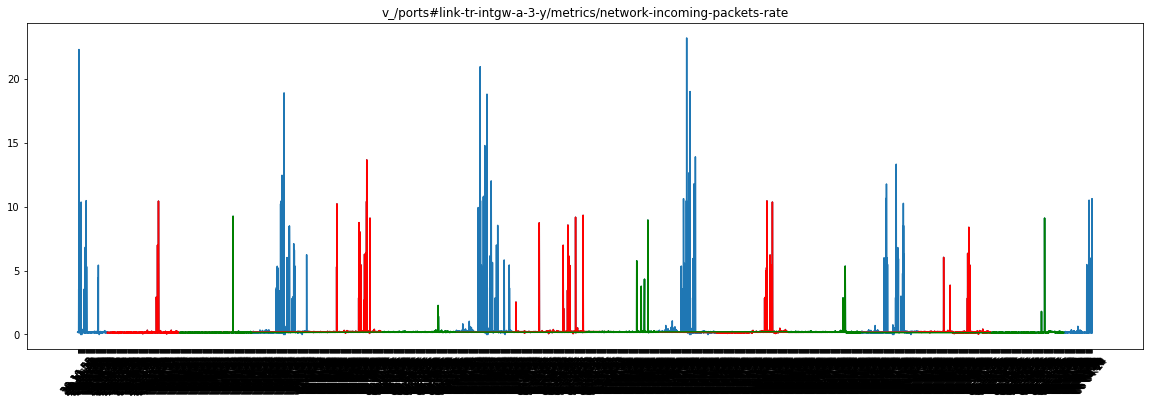

In [84]:
show_rate(X, 858, code_56_list, code_78_list)

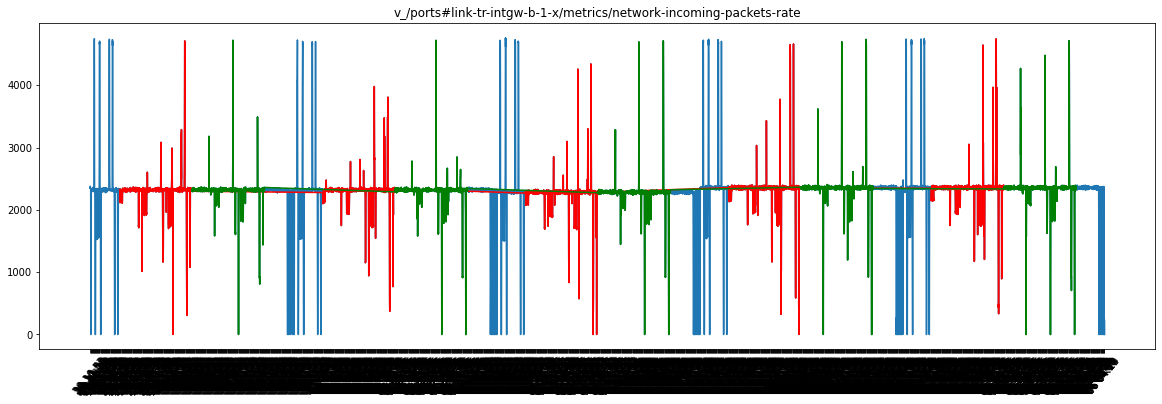

In [85]:
show_rate(X, 870, code_56_list, code_78_list)

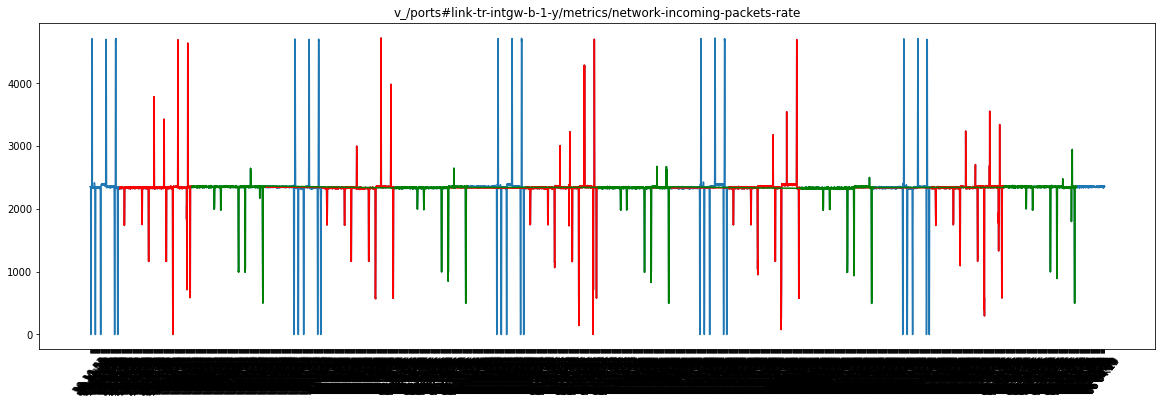

In [87]:
show_rate(X, 882, code_56_list, code_78_list)

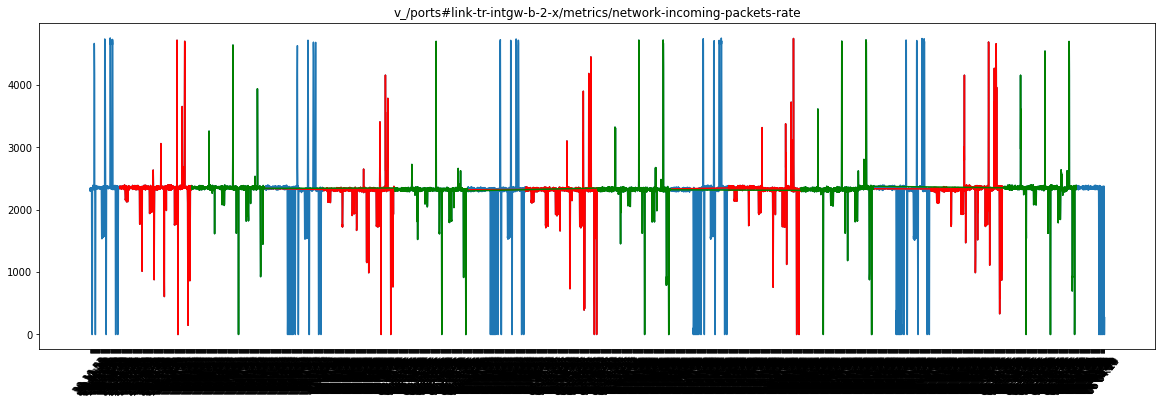

In [88]:
show_rate(X, 894, code_56_list, code_78_list)

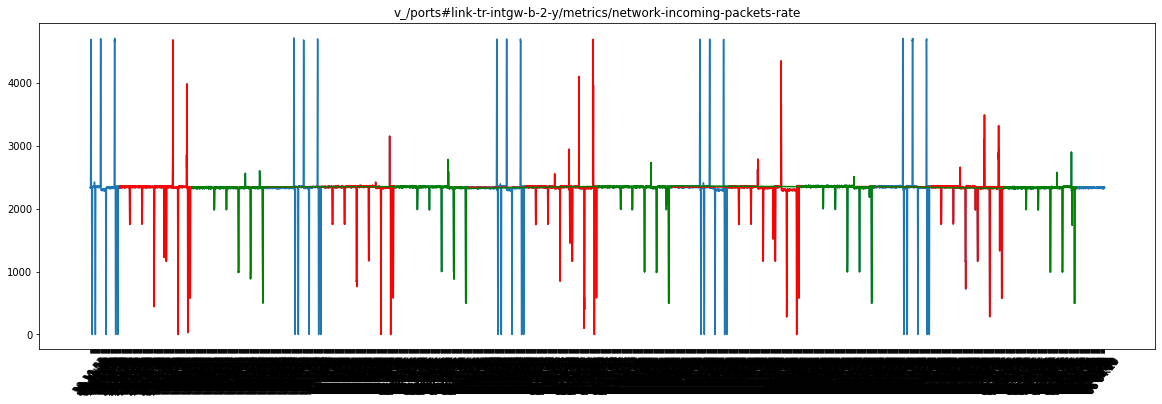

In [89]:
show_rate(X, 906, code_56_list, code_78_list)

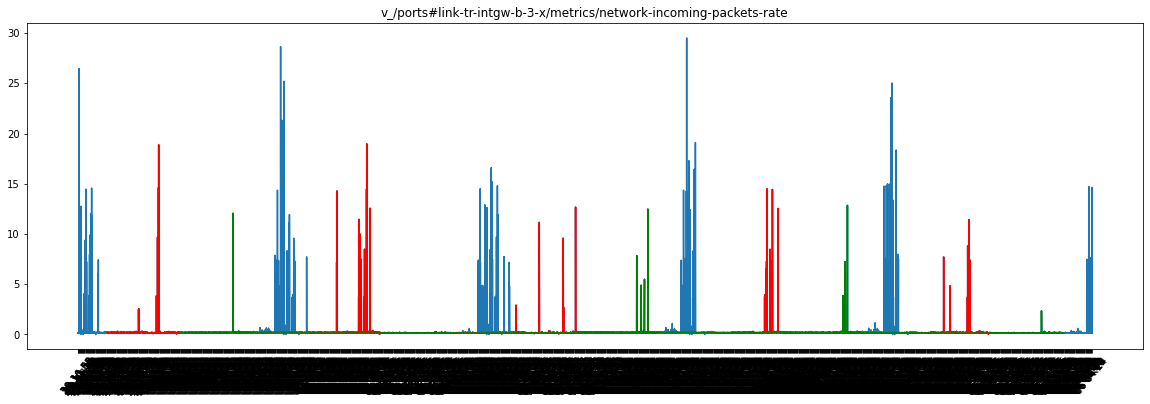

In [90]:
show_rate(X, 918, code_56_list, code_78_list)

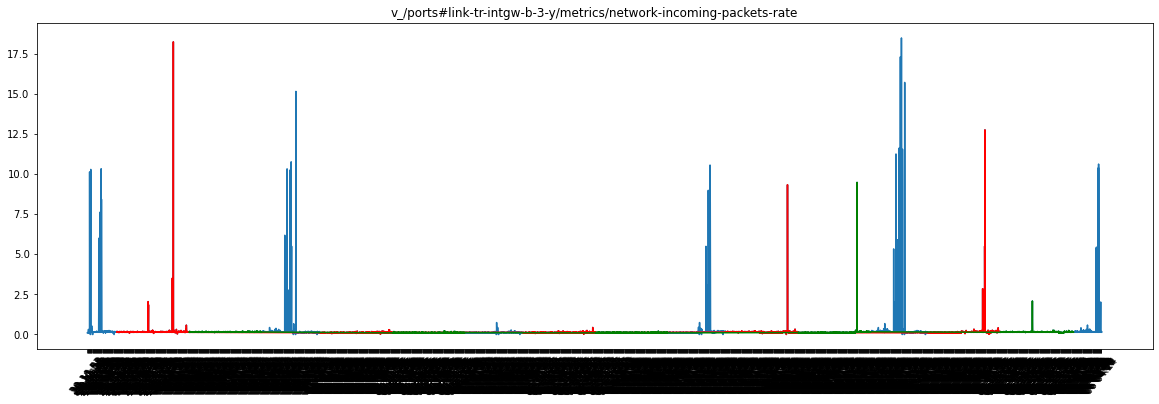

In [91]:
show_rate(X, 930, code_56_list, code_78_list)

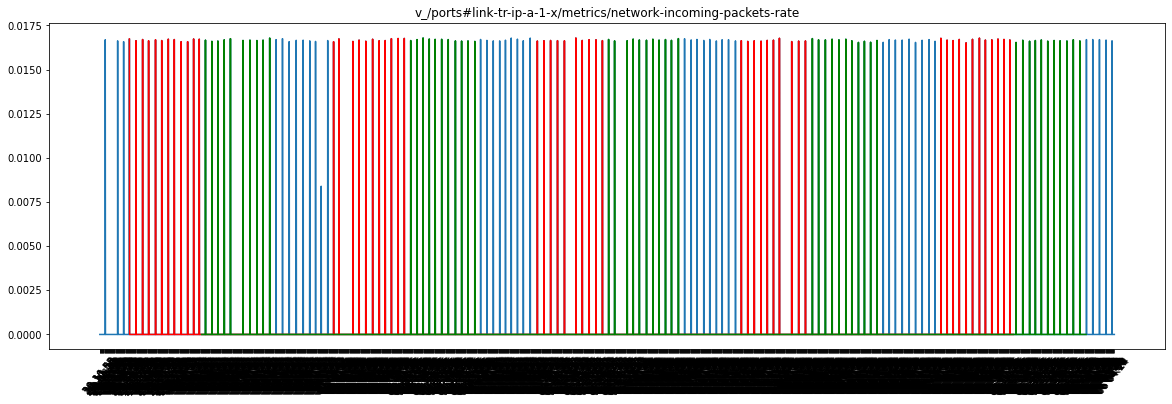

In [92]:
show_rate(X, 942, code_56_list, code_78_list)

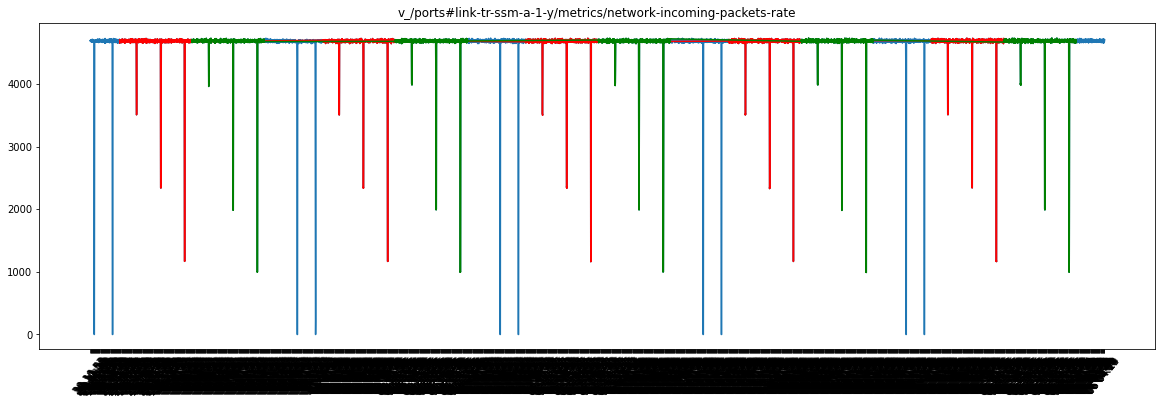

In [93]:
show_rate(X, 954, code_56_list, code_78_list)

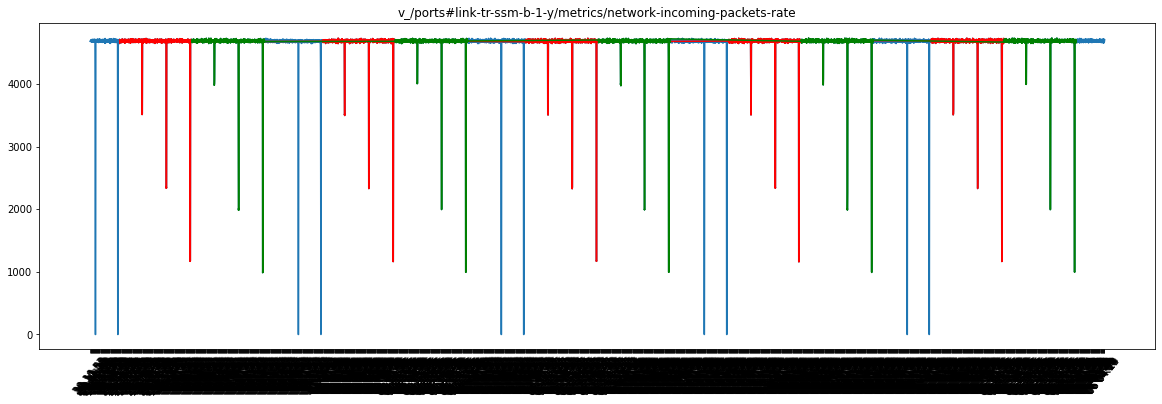

In [94]:
show_rate(X, 966, code_56_list, code_78_list)

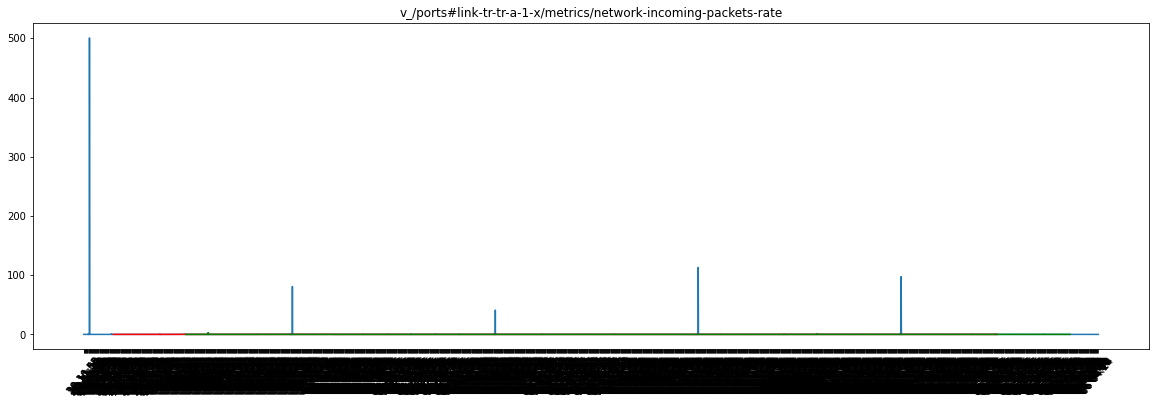

In [95]:
show_rate(X, 978, code_56_list, code_78_list)

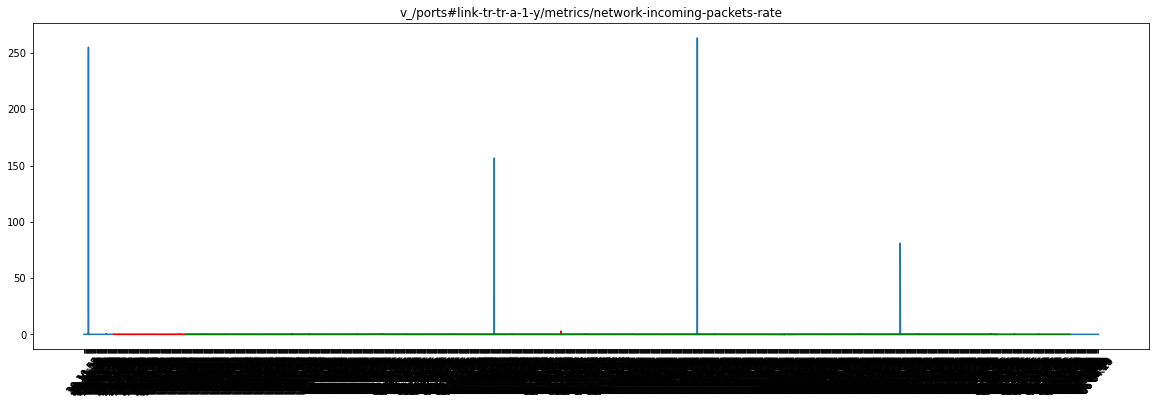

In [96]:
show_rate(X, 990, code_56_list, code_78_list)